<a href="https://colab.research.google.com/github/josefinasolisb/project2/blob/main/Project2_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Wagner,Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q.



In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project_2/secondary_data.csv',delimiter=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

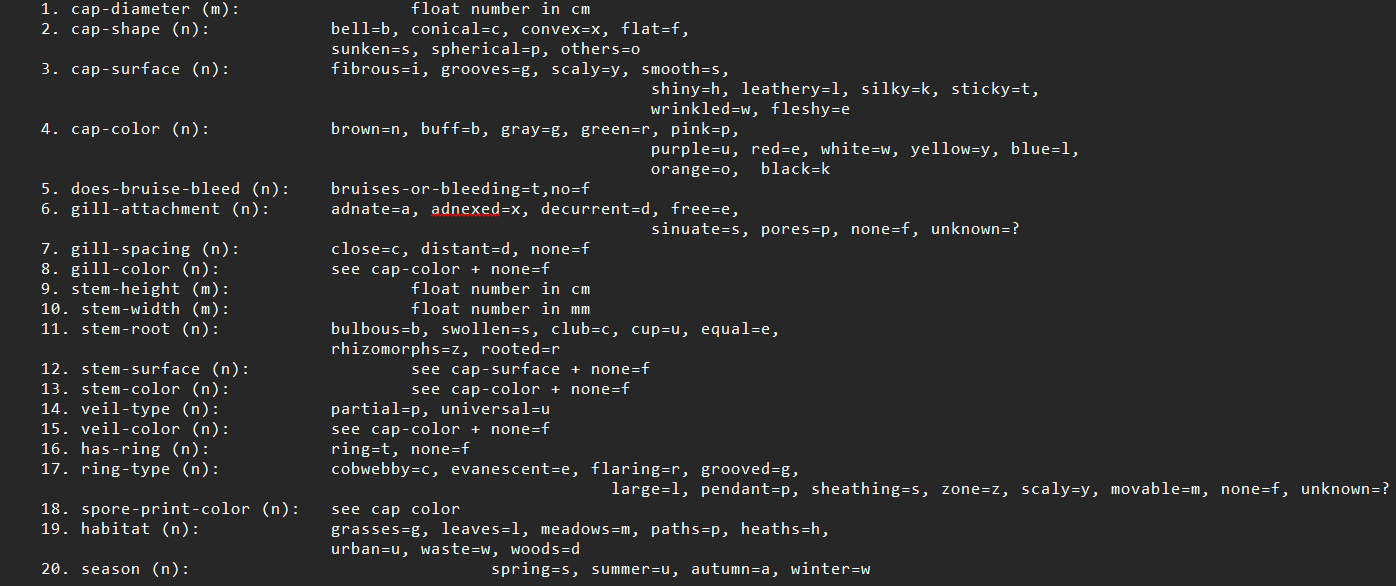

In [19]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Con esta informacion podemos darnos cuentas con facilidad que hay columnas con una gran cantidad de datos faltantes. Especificamente las columnas 'stem-root', 'veil-type', 'veil-color' y 'spore-print-color' tienen mas de 50 mil datos faltantes, lo que representa mas del 80% de valores desconocidos. Lo mas conveniente es eliminar estas columnas ya que no se cuenta con informacion suficiente para poder imputarlos y al ser tantos, es probable que se introduzca ruido en el conjunto de datos distorsionando los resultados del modelo de machine learning.

In [20]:
null_percent = df.isnull().mean() * 100

# Definir el umbral para eliminar columnas (60%)
threshold = 60

# Identificar columnas con mas de 60% de valores nulos
columns_drop = null_percent[null_percent > threshold].index

# Eliminar columnas
df.drop(columns=columns_drop, inplace=True)
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

<ipython-input-21-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
<ipython-input-21-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
<ipython-input-21-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
<ipython-input-21-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

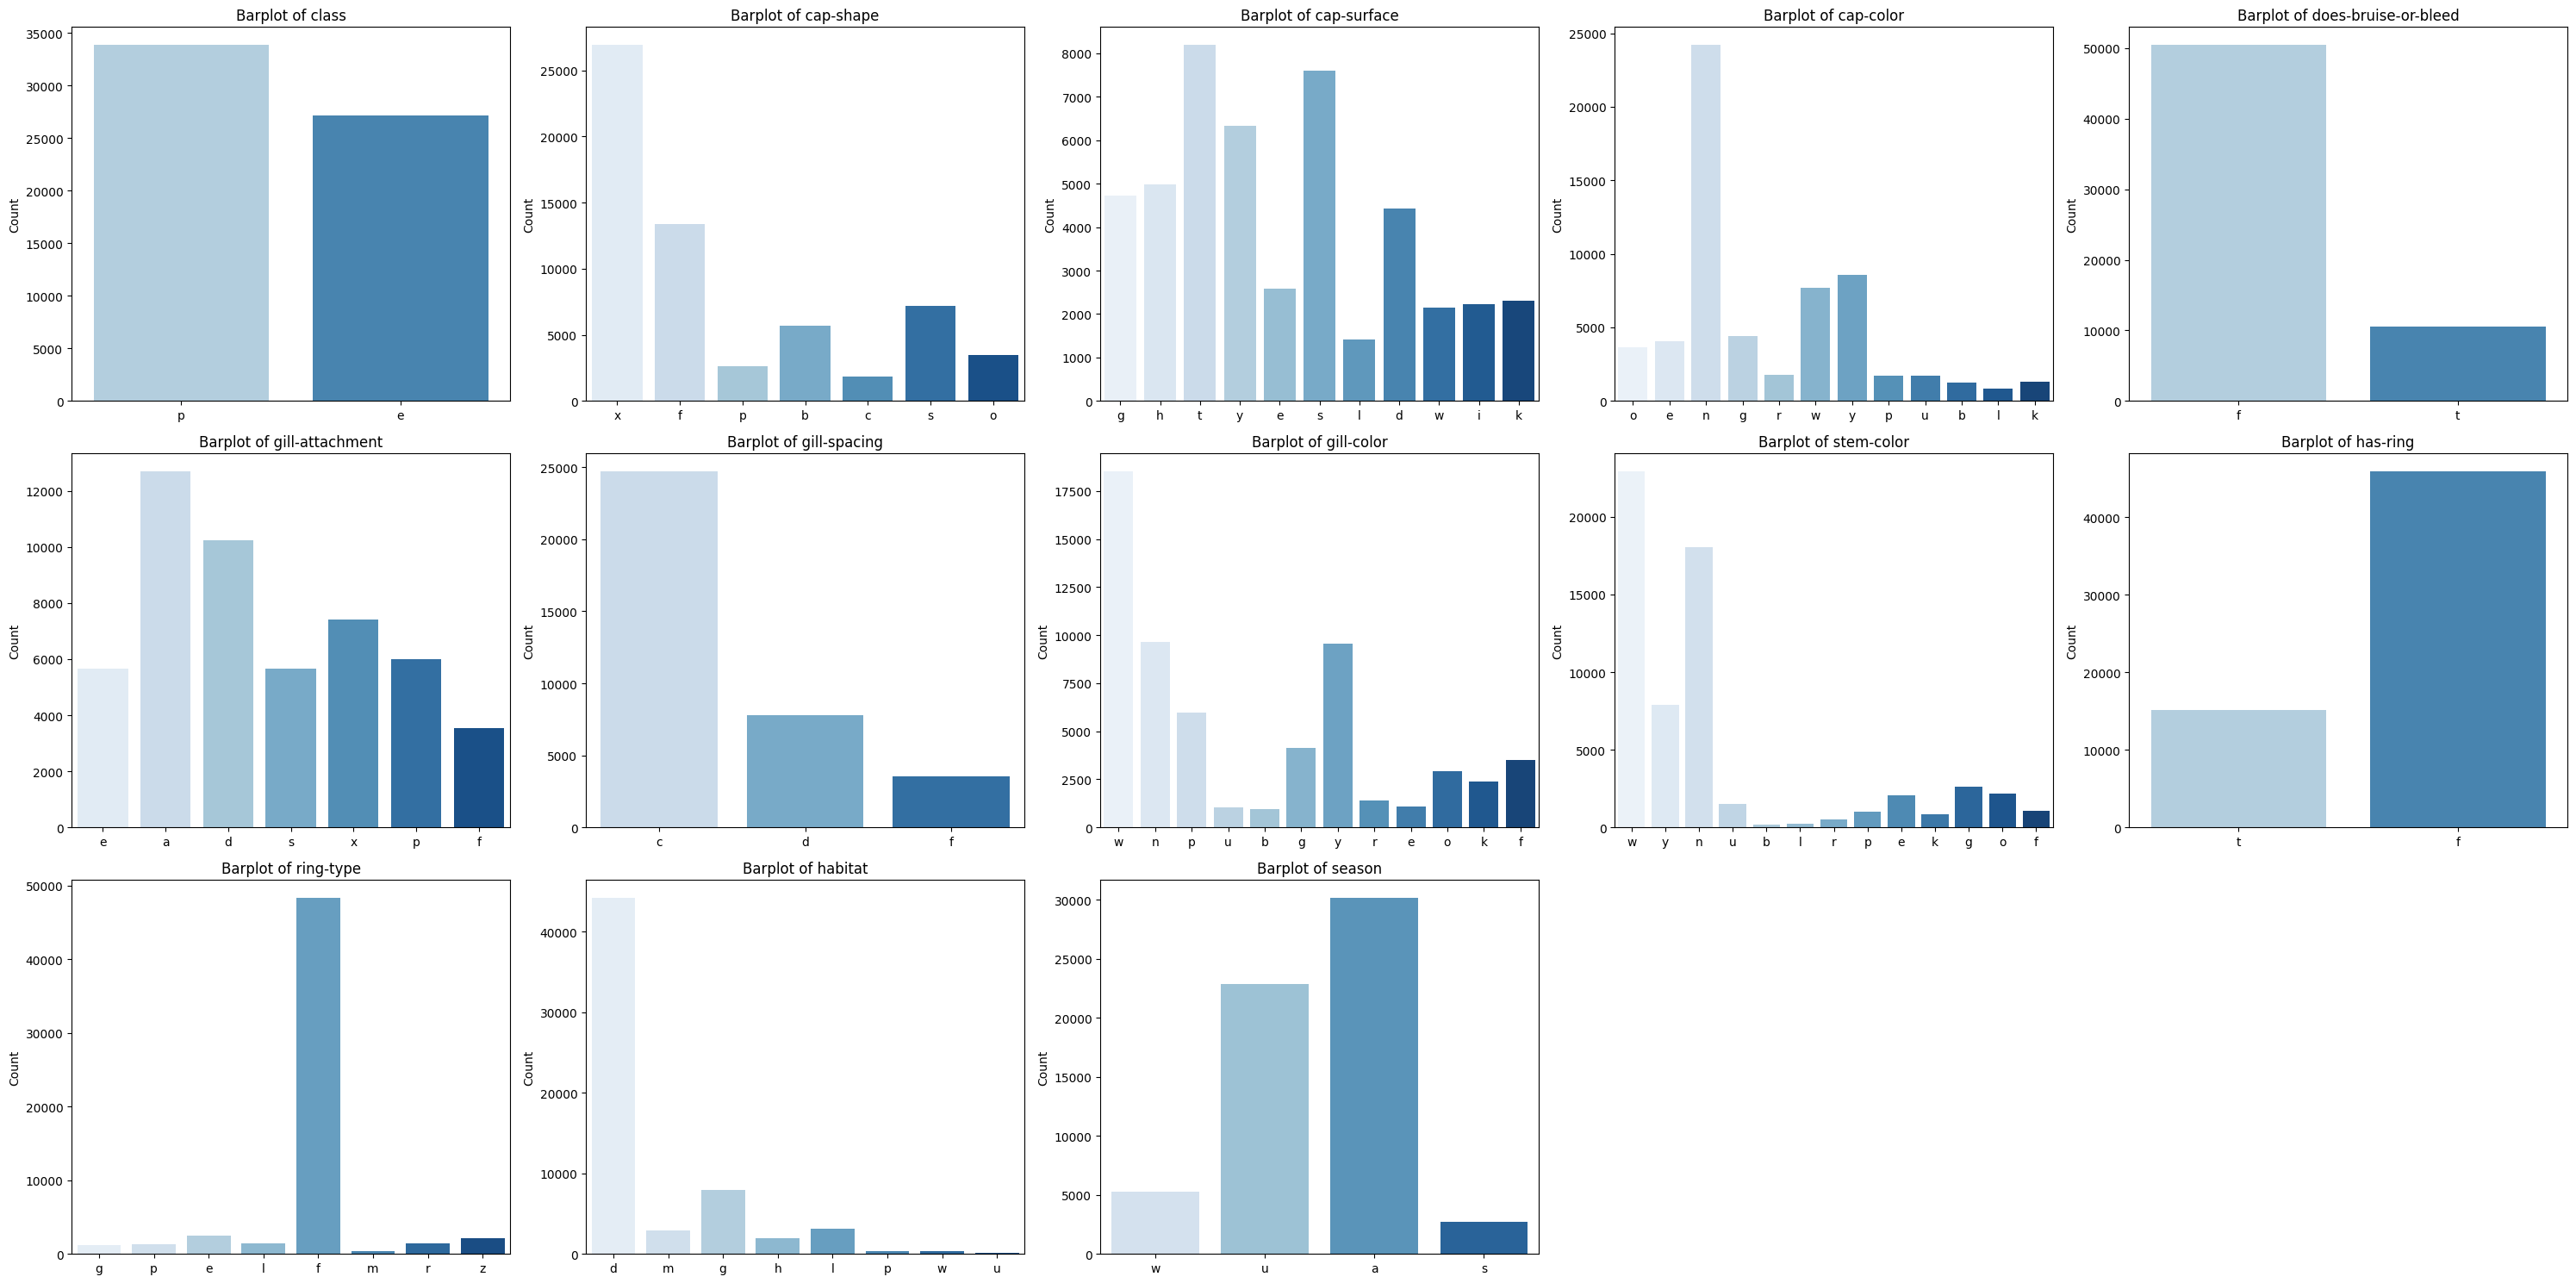

In [21]:
# Lista de columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Crear una cuadrícula para los gráficos de las columnas
n_cols = 5
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

# Aplana el arreglo de ejes para facilitar la iteración
axes = axes.flatten()

# Crear los gráficos
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
    axes[i].set_title(f'Barplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Elimina cualquier subgráfico no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**La variable objetivo es 'class**', para clasificar si los hongos son comestibles o venenosos. Donde 'p' = venenoso y 'e' = comestible. En el primer grafico se puede ver que la mayoria son venenosos.


En la mayoria de graficos se ve que la dispersion de los datos es variada, unicamente en 'does-bruise-or-bleed', 'ring-type' y 'habitat' hay una sola variable que predomina sobre las otras ('f', 'f' y 'd' para cada caso). De estas, 'ring-type' contiene datos faltantes y la 'f' representa 'none'. En pasos posteriores se tranformaran los datos faltantes en 'f' para las columnas donde el diccionario de datos considere como 'f' a los datos faltantes.

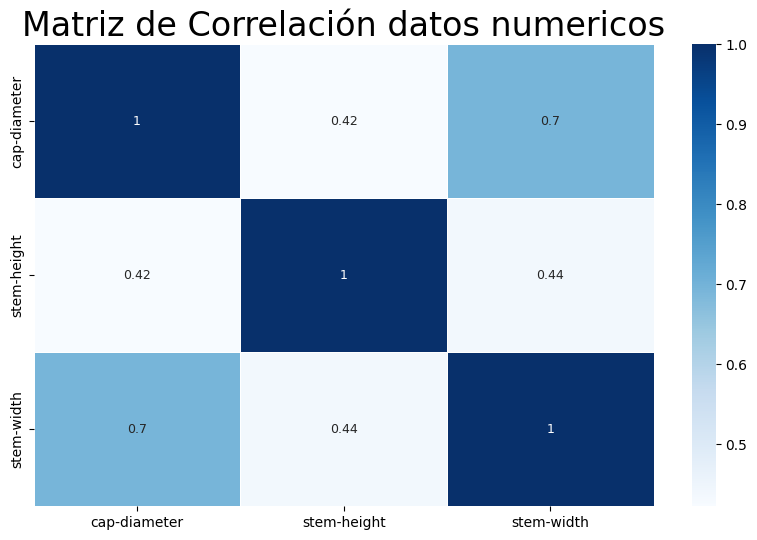

In [8]:
numeric_vars = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_vars.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, annot_kws={"fontsize":9})
plt.title('Matriz de Correlación datos numericos', fontsize=24)
plt.show()

Segun el mapa de correlacion, existe una correlacion semi alta entre 'cap-diameter' y 'stem-width' con un valor de 0.7. Esto puede ser a que el ancho del tallo esta en funcion al diametro de este.

In [9]:
def unique_values(df):
    sorted_unique_values = {}
    for column_name in df.columns:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            sorted_values = sorted(df[column_name].dropna().unique())
        else:
            sorted_values = sorted(df[column_name].astype(str).unique())
        sorted_unique_values[column_name] = sorted_values
    return sorted_unique_values

#Imprimir los valores unicos por columna
unique_values_dict = unique_values(df)
for column, values in unique_values_dict.items():
    print(f"{column}: {values}")

class: ['e', 'p']
cap-diameter: [0.38, 0.44, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08,

Observando estos datos, se identificó que no tiene mucho sentido tener altura y ancho del tallo con valor 0. Hay dos opciones para abordar este problema:
1. Eliminar las filas donde hay valores 0
2. Convertir los 0 a 'Nan' e imputarlos

La segunda opcion implica introducir errores en el conjunto de datos por lo que se elegirá la primera opcion. En caso las metricas de los modelos de clasificacion sean malos, existe la posibilidad de regresar a este punto y utilizar la opcion 2 para tratar los datos.

In [10]:
# Eliminar las filas donde hay valores 0 en las columnas numericas.
df = df[(df != 0).all(axis=1)]

In [11]:
df.loc[:, 'class'] = df['class'].map({'p': 1, 'e': 0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60010 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60010 non-null  object 
 1   cap-diameter          60010 non-null  float64
 2   cap-shape             60010 non-null  object 
 3   cap-surface           45890 non-null  object 
 4   cap-color             60010 non-null  object 
 5   does-bruise-or-bleed  60010 non-null  object 
 6   gill-attachment       50479 non-null  object 
 7   gill-spacing          34947 non-null  object 
 8   gill-color            60010 non-null  object 
 9   stem-height           60010 non-null  float64
 10  stem-width            60010 non-null  float64
 11  stem-color            60010 non-null  object 
 12  has-ring              60010 non-null  object 
 13  ring-type             57539 non-null  object 
 14  habitat               60010 non-null  object 
 15  season                60

Como se menciono anteriormente y como se puede ver en el diccionario de datos, se considera que en algunas columnas los valores 'none' tengan el valor 'f'. Luego de revisar esto, las columnas 'cap-surface', 'gill-attachment', 'gill-spacing' y 'ring-type'  se completaran con 'f'.  

In [13]:
df = df.fillna('f')

In [14]:
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64